In [1]:
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

#different from original code-- directly putting the library path
spice_library = SpiceLibrary('/home/ros/Desktop/UD_Summer_Research/Analog_Circuit_Generation/PIAAC/PySpice/examples/libraries')

ModuleNotFoundError: No module named 'matplotlib'

In [9]:
circuit = Circuit('NMOS Transistor')
circuit.include(spice_library['ptm65nm_nmos'])

In [10]:
# Define the DC supply voltage value
Vdd = 1.1

# Instanciate circuit elements
Vgate = circuit.V('gate', 'gatenode', circuit.gnd, 0@u_V)
Vdrain = circuit.V('drain', 'vdd', circuit.gnd, u_V(Vdd))
# M <name> <drain node> <gate node> <source node> <bulk/substrate node>
circuit.MOSFET(1, 'vdd', 'gatenode', circuit.gnd, circuit.gnd, model='ptm65nm_nmos')

print(circuit)

.title NMOS Transistor
.include /home/ros/Desktop/UD_Summer_Research/Analog_Circuit_Generation/PIAAC/PySpice/examples/libraries/transistor/ptm_65nm_nmos_bulk.mod
Vgate gatenode 0 0V
Vdrain vdd 0 1.1V
M1 vdd gatenode 0 0 ptm65nm_nmos



2025-06-12 16:09:24,582 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - WARNING - spinit was not found
2025-06-12 16:09:24,583 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._send_char - ERROR - Note: can't find init file.
2025-06-12 16:09:24,593 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._init_ngspice - WARNING - Unsupported Ngspice version 36


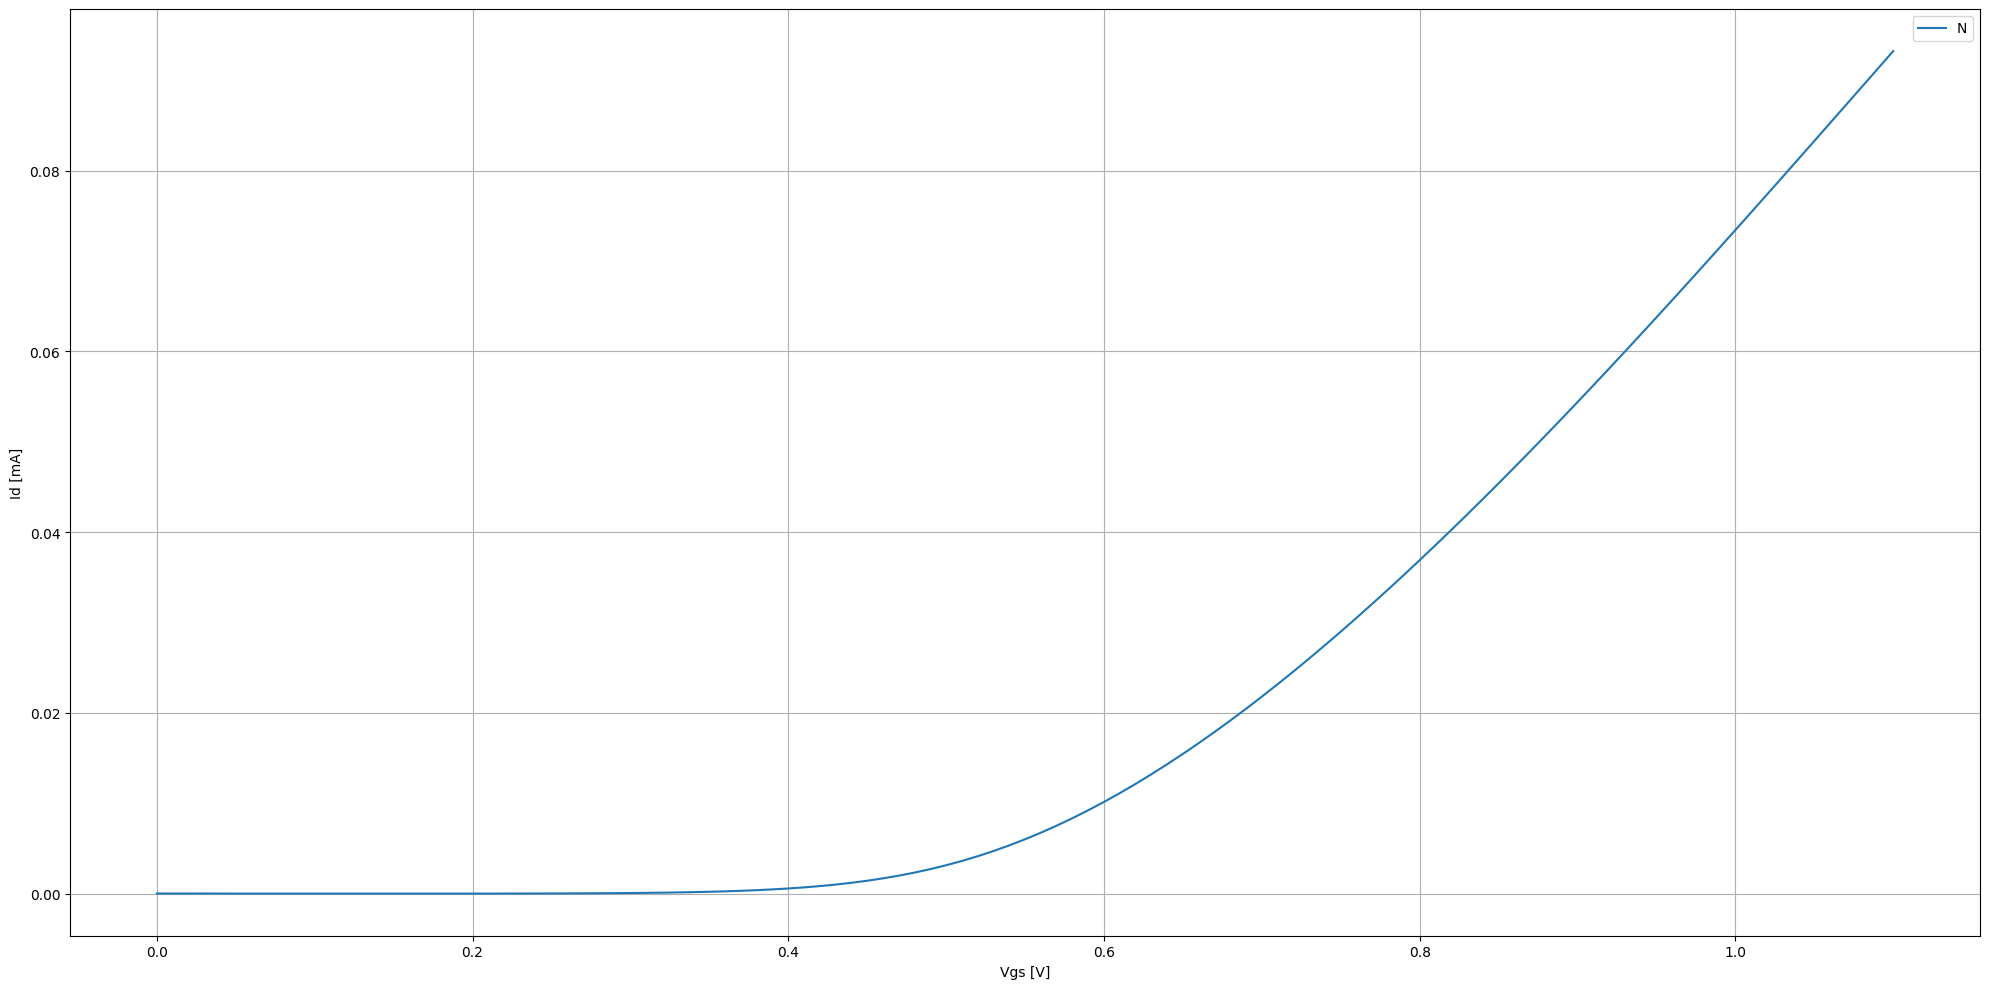

In [11]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(Vgate=slice(0, Vdd, .01))

figure, ax = plt.subplots(figsize=(20, 10))

ax.plot(analysis['gatenode'], u_mA(-analysis.Vdrain))
ax.legend('NMOS characteristic')
ax.grid()
ax.set_xlabel('Vgs [V]')
ax.set_ylabel('Id [mA]')

plt.tight_layout()
plt.show()